>`> INTEGRANTES`

`ESCOBAR LINARES MAYRA LISBETH         25-3745-2018`

`ORTEGON ESCOBAR RUBEN                 25-0001-2018`

`PÉREZ ALBERTO LUIS GUSTAVO            25-4879-2006`

In [1]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import seaborn as sns               #seaborn
from datetime import datetime       #Datetime

In [2]:
pd.set_option("display.max_rows",4)#Cantidad de filas a mostrar
pd.set_option("display.max_columns",24)#Cantidad de columnas a mostrar

`CICLO VIA`

In [4]:
# CSV= "/content/sample_data/CicloVia.csv"
CSV= "CicloVia.csv"
dfCicloVia = pd.read_csv(CSV, sep=",")
dfCicloVia

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,44,4357,442,01/02/2020,0:00:38,116,01/02/2020,0:35:17
1,M,22,12083,66,01/02/2020,0:00:53,37,01/02/2020,0:06:23
...,...,...,...,...,...,...,...,...,...
686325,M,48,8495,27,28/02/2020,23:59:54,119,29/02/2020,0:06:44
686326,M,33,7992,137,28/02/2020,23:59:56,154,29/02/2020,0:10:15


In [5]:
dfCicloVia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686327 entries, 0 to 686326
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Genero_Usuario         686327 non-null  object
 1   Edad_Usuario           686327 non-null  int64 
 2   Bici                   686327 non-null  int64 
 3   Ciclo_Estacion_Retiro  686327 non-null  int64 
 4   Fecha_Retiro           686327 non-null  object
 5   Hora_Retiro            686327 non-null  object
 6   Ciclo_Estacion_Arribo  686327 non-null  int64 
 7   Fecha_Arribo           686327 non-null  object
 8   Hora_Arribo            686327 non-null  object
dtypes: int64(4), object(5)
memory usage: 47.1+ MB


In [7]:
# Convertir la columna "fecha_hora" en formato datetime
dfCicloVia['fecha_hora'] = pd.to_datetime(dfCicloVia['Fecha_Arribo'] + ' ' + dfCicloVia['Hora_Arribo'], format='%d/%m/%Y %H:%M:%S')
dfCicloVia['fecha_hora'] = pd.to_datetime(dfCicloVia['fecha_hora'])

In [8]:
# Filtrar los datos por fechas específicas
F_inicio = pd.to_datetime('2020-02-24')
F_fin = pd.to_datetime('2020-02-28')
viajes_dias = dfCicloVia[(dfCicloVia['fecha_hora'] >= F_inicio) & (dfCicloVia['fecha_hora'] <= F_fin)]

In [9]:
# Agrupar por hora y contar los viajes
viajes_dias['horas'] = viajes_dias['fecha_hora'].dt.floor('H')
cont_viajes = viajes_dias.groupby('horas').size().reset_index(name='cont')

# Crear un DataFrame con todas las horas completas entre la hora mínima y máxima
horas_comp = pd.DataFrame({'horas': pd.date_range(viajes_dias['horas'].min(), viajes_dias['horas'].max(), freq='H')})

C:\Users\yahoo\AppData\Local\Temp\ipykernel_17840\929975314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_dias['horas'] = viajes_dias['fecha_hora'].dt.floor('H')


In [ ]:
# Agrupar las horas completas y combinar con los datos de viajes diarios
viajes_H = horas_comp.merge(cont_viajes, how='left', on='horas')
viajes_H['cont'] = viajes_H['cont'].fillna(0)

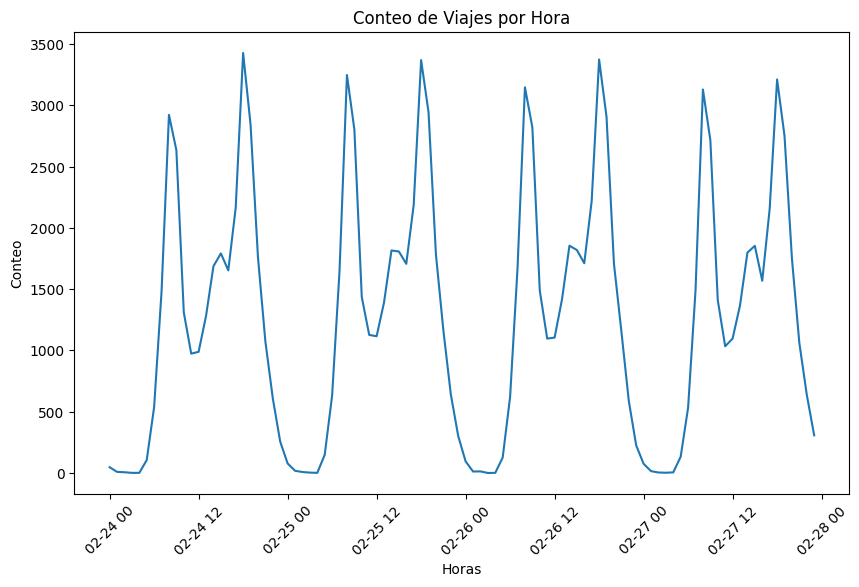

,horas,conteo
0,2020-02-24 00:00:00,47.0
1,2020-02-24 01:00:00,9.0
...,...,...
3,2020-02-24 03:00:00,1.0
4,2020-02-24 04:00:00,1.0


In [10]:
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(viajes_H['horas'], viajes_H['cont'])
plt.xlabel('Horas')
plt.ylabel('cont')
plt.title('cont de Viajes por Hora')
plt.xticks(rotation=45)
plt.show()

# Ver los datos de viajes_dias
viajes_dias.head()

# Ver los datos de horas_comp
horas_comp.head()

# Ver los datos de viajes_H
viajes_H.head()

`GOOGLE PLAY`

In [17]:
# CSV= "/content/sample_data/Google-Playstore.csv"
CSV= "Google-Playstore.csv"
dfGooglePlay = pd.read_csv(CSV, sep=",")
dfGooglePlay

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19
2312943,Biliyor Musun - Sonsuz Yarış,com.yyazilim.biliyormusun,Trivia,5.0,12.0,100+,100.0,354,True,0.0,USD,5.2M,5.0 and up,Y Yazılım,NaN,yyazilimdevelop@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://biliyor-musun-sons.flycricket.io/priva...,True,False,False,2021-06-16 12:59:19


In [13]:
dfGooglePlay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [19]:
# Agrupando por "category", creando un nuevo index y calculando el porcentaje 
# de cada grupo dividiendo el tamaño del grupo de la columna 'perc' 
apps = dfGooglePlay.groupby('Category').size().reset_index(name='n') \
    .assign(Percentage=lambda df: df['n'] / df['n'].sum(),
            Percentage_acum=lambda df: df['Percentage'].cumsum()) \
    .sort_values('n', ascending=False)

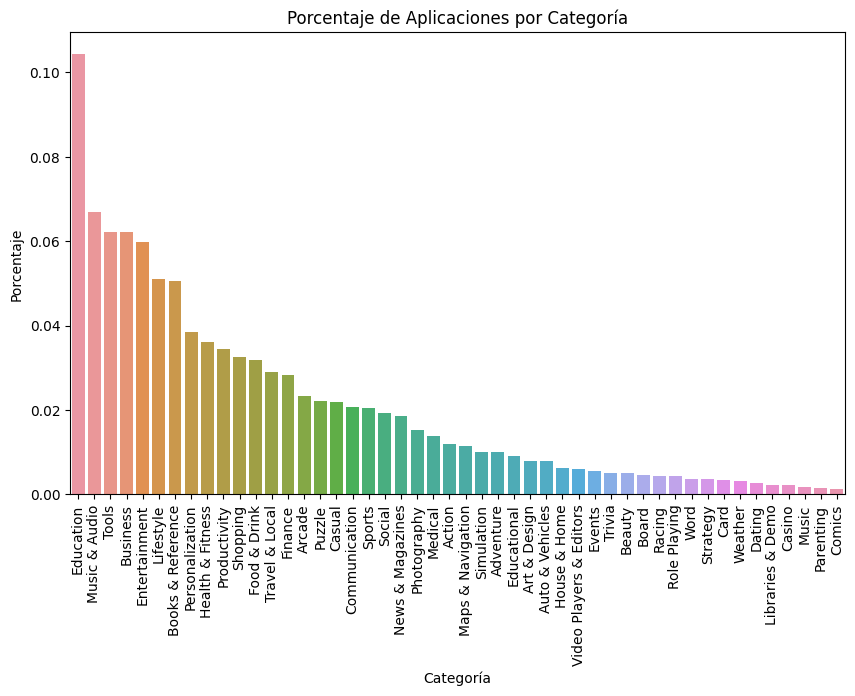

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=apps, x='Category', y='Percentage')
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Aplicaciones por Categoría')
plt.show()

In [10]:
# FRECUENCIA ABSOLUTA
# Cantidad de veces que un valor aparece en una muestra
muestras = [1, 2, 3, 4, 3, 2, 6, 7, 3, 3, 1, 8, 5, 9]
absolutos = []
frecuencias = []
for n in muestras:
 if not n in absolutos:
  absolutos.append(n)
  fi = muestras.count(n)
  frecuencias.append(fi)
N = sum(frecuencias) # == len(muestras)
# FRECUENCIA RELATIVA
# Cociente entre la frecuencia absoluta y N
relativas = [float(fi) / N for fi in frecuencias]
sumarelativas = round(sum(relativas)) # == 1
# FRECUENCIA ACUMULADA
# Suma de todas las frecuencias menores o iguales a la frecuencia absoluta
frecuencias.sort()
acumuladas = [sum(frecuencias[:i+1]) for i, fi in enumerate(frecuencias)]
# FRECUENCIA RELATIVA ACUMULADA
# Cociente entre frecuencia acumulada y cantidad total de datos
relacumuladas = [float(f) / N for f in acumuladas]

plt.figure(figsize=(10, 6))
sns.barplot(data=apps, x=absolutos, y=muestras)
# sns.barplot(data=apps, x=absolutos, y=muestras)
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Aplicaciones por Categoría')
plt.show()

KeyError: 1

<Figure size 1000x600 with 0 Axes>